In [27]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import math
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from numpy import genfromtxt
from pandas_datareader import data as pdr
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import mannwhitneyu
import datetime
import skfda

In [28]:
def GRU_Model(output_window):
  model = Sequential()
  model.add(GRU(150, return_sequences=False, input_shape=(X_train.shape[1], 1)))
  model.add(Dense(output_window))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.summary()
  return model

def LSTM_Model(output_window):
  model = Sequential()
  model.add(LSTM(150, return_sequences=False, input_shape=(X_train.shape[1], 1)))
  model.add(Dense(output_window))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.summary()
  return model

Data set:    [[[-0.06657371]
  [-0.04981095]
  [-0.03310659]
  ...
  [ 0.30050689]
  [ 0.29790122]
  [ 0.29532761]]

 [[-0.06859129]
  [-0.05126447]
  [-0.03399733]
  ...
  [ 0.34696373]
  [ 0.3452061 ]
  [ 0.34347831]]

 [[-0.06907575]
  [-0.05180134]
  [-0.03458674]
  ...
  [ 0.29794357]
  [ 0.29523921]
  [ 0.29256932]]

 ...

 [[-0.06941363]
  [-0.05187886]
  [-0.03440303]
  ...
  [ 0.3007645 ]
  [ 0.2992479 ]
  [ 0.29778421]]

 [[-0.0683659 ]
  [-0.05090044]
  [-0.03349436]
  ...
  [ 0.29501561]
  [ 0.2934691 ]
  [ 0.29197409]]

 [[-0.06950268]
  [-0.05196727]
  [-0.03449072]
  ...
  [ 0.31945081]
  [ 0.31838454]
  [ 0.3173658 ]]]
grid_points:    (array([ 43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,

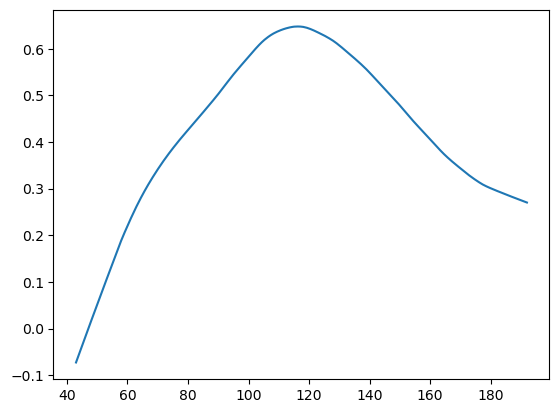

In [29]:
with open('hdvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
print(NDVI)
NDVI[30].plot()
serie = NDVI[40].data_matrix.flatten()
# For test
scostamento = 70

rangeForNewDate2 = range(43,193-scostamento) # Pixel di prova per fare predizione

zeroDay = datetime.datetime.strptime("2017-01-01","%Y-%m-%d")
days2 = []

for a in rangeForNewDate2:
    days2.append((zeroDay + datetime.timedelta(days=a)))
serie2 = NDVI[120].data_matrix.flatten()[:-(scostamento)]


In [30]:
f = 365

d_GRU = {'ds': np.arange(43,193), 'y': serie}
data_GRU = pd.DataFrame(data=d_GRU)
print(data_GRU.shape)


(150, 2)


In [34]:
# Train LSTM model
#lstm_trained = lstm_model.fit(data_GRU.to_numpy(), epochs=epochs)
## Train GRU model
#gru_trained = gru_model.fit(data_GRU.to_numpy(), epochs=epochs)
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
    
LOOK_BACK = 30
X_train, y_train = create_dataset(serie,LOOK_BACK)
X_test, y_test = create_dataset(serie2,LOOK_BACK)
print(X_train.shape)
lstm_model = LSTM_Model(30)
gru_model = GRU_Model(30)
epochs = 200 

lstm_trained = lstm_model.fit(x=X_train,y=y_train, epochs=epochs)
gru_trained = gru_model.fit(x=X_train,y=y_train, epochs=epochs)

(120, 30)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 150)               91200     
                                                                 
 dense_8 (Dense)             (None, 30)                4530      
                                                                 
Total params: 95,730
Trainable params: 95,730
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 150)               68850     
                                                                 
 dense_9 (Dense)             (None, 30)                4530      
                                                                 
Total params: 73,

# Andiamo ad eseguire il Test della rete

In [35]:

test1 = lstm_model.predict(X_test)
test2 = gru_model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [36]:
print(test1.shape)
'''compare = skfda.FDataGrid(
    data_matrix=test1[1,:],
    grid_points=range(43,193),
)
compare.plot()'''

(50, 30)


'compare = skfda.FDataGrid(\n    data_matrix=test1[1,:],\n    grid_points=range(43,193),\n)\ncompare.plot()'

In [ ]:
#Repeats the last known value f times
def baselinef(U,f):
  last = U.shape[0]
  yhat = np.zeros((last, f))
  for j in range(0,last):
    yhat[j,0:f] = np.repeat(U[j,U.shape[1]-1], f)
  return yhat

In [ ]:
def mda(actual: np.ndarray, predicted: np.ndarray):
  return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [ ]:
#Testing
s=(10,6) 
s=np.ones(s)  #for the results

for j in range(0,150):
  scaled_data = serie[j, :] #Changes the index of time_series
  scaled_data = np.reshape(scaled_data, (len(scaled_data),1)) 
  scaled_data.shape
  _ , _ , testX, testY, _ = data_preparation(window, scaled_data, N, f)
  y_pred_lstm = lstm_model.predict(testX)
  y_pred_gru = gru_model.predict(testX)
  y_baseline = baselinef(testX,f) 
  testY = np.reshape(testY, (testY.shape[0],testY.shape[1]))
  print(testY.shape)
  s[j,0] = np.sqrt(mean_squared_error(testY, y_pred_lstm))
  s[j,1] = np.sqrt(mean_squared_error(testY, y_pred_gru))
  s[j,2] = np.sqrt(mean_squared_error(testY, y_baseline))
  s[j,0+3] = mda(testY, y_pred_lstm)
  s[j,1+3] = mda(testY, y_pred_gru)
  s[j,2+3] = mda(testY, y_baseline)